#  Regression and Classification

## OUTLINE: 

Data pre-processing, regression task and classification task

1. Reading the files
2. Missing Values
3. Imputing categorical variables
4. Imputing numerical variables
5. Classification with Decision Tree, single split
6. Classification with Decision Tree, Cross validation
7. Interpretation of the results

In [225]:
# these are the libraries that you will need throughout the assignment
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from matplotlib.colors import ListedColormap


RSEED = 8

The datasets contain information about adult patients from the US and from Switzerland. You can find more information in the heart-disease.names file .

In [226]:
# From the folder 'data', read the files cleveland.data and switzerland.data into the dataframes cleveland and test, respectively.
 # you can find the column names in the file 'data/heart-disease.names'.

columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
# Select the correct column names for the dataset, as described in the file.

cleveland = pd.read_csv('cleveland.data', names=columns) 
test = pd.read_csv('switzerland.data', names=columns)


In [227]:
# if you want to see information about the dataset, uncomment:
#cleveland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [228]:
# if you want to see information about the dataset, uncomment:
#test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,?,0,127.0,0.0,0.7,1,?,?,1.0
1,34.0,1.0,4.0,115.0,0.0,?,?,154.0,0.0,0.2,1,?,?,1.0
2,36.0,1.0,4.0,110.0,0.0,?,0,125.0,1.0,1.0,2,?,6,1.0
3,38.0,0.0,4.0,105.0,0.0,?,0,166.0,0.0,2.8,1,?,?,2.0
4,38.0,0.0,4.0,110.0,0.0,0,0,156.0,0.0,0.0,2,?,3,1.0


In [229]:
# if you want to see information about the dataset, uncomment:
#cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,60.270627,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,77.296578,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,0.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,999.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [230]:
# if you want to see information about the dataset, uncomment:
#test.describe()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,num
count,122.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000,117.000000
mean,82.409836,0.914530,3.683761,129.957265,0.0,122.299145,0.435897,0.653846,1.769231
std,170.211621,0.280782,0.702822,22.423200,0.0,25.759921,0.498007,1.056061,1.011866
min,0.000000,0.000000,1.000000,80.000000,0.0,60.000000,0.000000,-2.600000,0.000000
25%,48.500000,1.000000,4.000000,115.000000,0.0,105.000000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,121.000000,0.000000,0.300000,2.000000
75%,61.000000,1.000000,4.000000,145.000000,0.0,141.000000,1.000000,1.500000,3.000000
max,999.000000,1.000000,4.000000,200.000000,0.0,182.000000,1.000000,3.700000,4.000000


## *2.* Missing values

### Producing a plot with two subplots, each showing a bar plot of the 'missing' values (either encoded as NaN, or encoded with values that should not be in the dataset) for each feature for the two dataframes. 

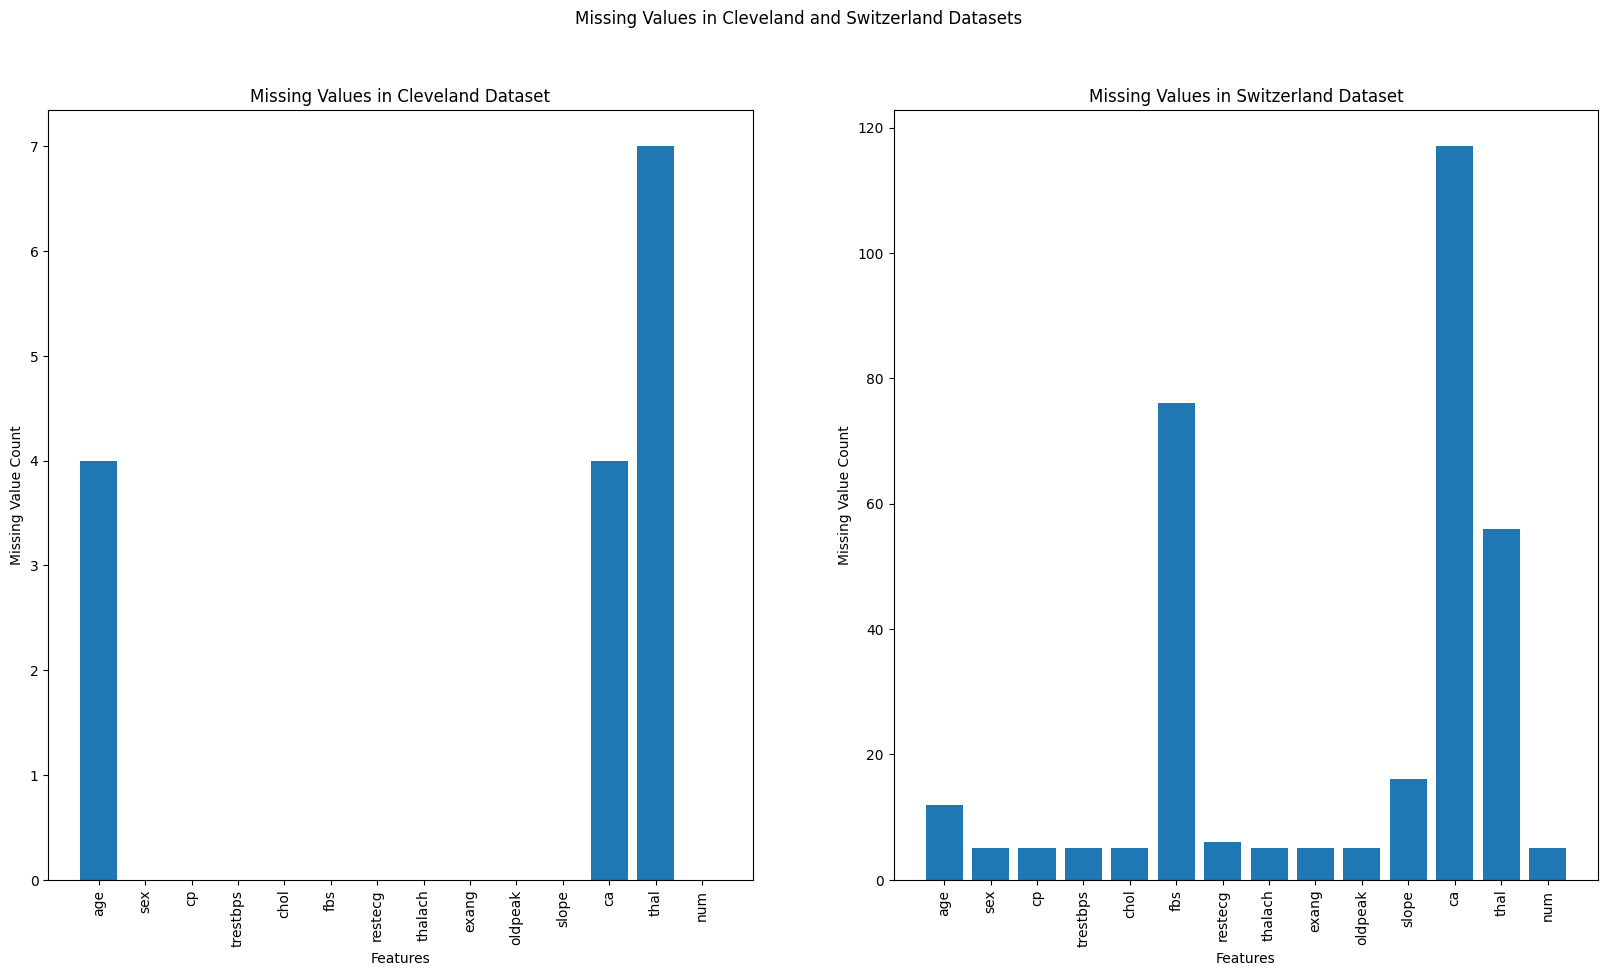

Missing values in Cleveland dataset:
 age         4
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        7
num         0
dtype: int64

Missing values in Switzerland dataset:
 age          12
sex           5
cp            5
trestbps      5
chol          5
fbs          76
restecg       6
thalach       5
exang         5
oldpeak       5
slope        16
ca          117
thal         56
num           5
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,NaN,0,127.0,0.0,0.7,1,NaN,NaN,1.0
1,34.0,1.0,4.0,115.0,0.0,NaN,NaN,154.0,0.0,0.2,1,NaN,NaN,1.0
2,36.0,1.0,4.0,110.0,0.0,NaN,0,125.0,1.0,1.0,2,NaN,6,1.0
3,38.0,0.0,4.0,105.0,0.0,NaN,0,166.0,0.0,2.8,1,NaN,NaN,2.0
4,38.0,0.0,4.0,110.0,0.0,0,0,156.0,0.0,0.0,2,NaN,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,70.0,1.0,4.0,115.0,0.0,0,1,92.0,1.0,0.0,2,NaN,7,1.0
113,70.0,1.0,4.0,140.0,0.0,1,0,157.0,1.0,2.0,2,NaN,7,3.0
114,72.0,1.0,3.0,160.0,0.0,NaN,2,114.0,0.0,1.6,2,2,NaN,0.0
115,73.0,0.0,3.0,160.0,0.0,0,1,121.0,0.0,0.0,1,NaN,3,1.0


In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


cleveland = pd.DataFrame(cleveland)
test = pd.DataFrame(test)
# Replacing the  '!' and '?' which i observed in the columnes before with NaN 
cleveland.replace(['!', '?'], np.nan, inplace=True)
test.replace(['!', '?'], np.nan, inplace=True)

# the data base includes some invalid ages over 100 and under zero and I replaced them with NaN
cleveland.loc[(cleveland['age'] <= 0) | (cleveland['age'] > 100), 'age'] = np.nan
test.loc[(test['age'] < 1) | (test['age'] > 100), 'age'] = np.nan


# Calculating missing values 
missing_values_cleveland = cleveland.isnull().sum()
missing_values_test = test.isnull().sum()

# starting plotting the missing values 
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Cleveland dataset bar plot
axes[0].bar(cleveland.columns, missing_values_cleveland)
axes[0].set_title('Missing Values in Cleveland Dataset')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Missing Value Count')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x labels for better visibility

# Switzerland (test) dataset bar plot
axes[1].bar(test.columns, missing_values_test)
axes[1].set_title('Missing Values in Switzerland Dataset')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Missing Value Count')
axes[1].tick_params(axis='x', rotation=90)

# plot
plt.suptitle("Missing Values in Cleveland and Switzerland Datasets")
plt.show()

# Printing missing values for clarification
print("Missing values in Cleveland dataset:\n", missing_values_cleveland)
print("\nMissing values in Switzerland dataset:\n", missing_values_test)

# I decided to delete the 5 last rows of the data set as it has so many Nan values 
test = test[:-5]
test

## *3.* Imputing categorical variables



In [232]:
import pandas as pd
import numpy as np

# categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']

# Change categorical columns to object for clarity
cleveland[categorical_columns] = cleveland[categorical_columns].astype('object')

# numerical columns

numerical_columns_float = ['chol', 'oldpeak','age', 'trestbps', 'thalach']
# Convert float columns to float type 
cleveland[numerical_columns_float] = cleveland[numerical_columns_float].astype(float)

# doublechecking the updated types to see if they have been updated correctly 
cleveland.dtypes


age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num          object
dtype: object

### `  Spliting the cleveland dataframe in a train and a validation set. `

The train set is called train, the the validation set is called val. The size of the validation set is  30% of the total size of the cleveland dataframe.

In [233]:
# Split the data into X and y, where X contains the features and y contains the target variable.
from sklearn.model_selection import train_test_split
X_cleveland = cleveland[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]  
y_cleveland = cleveland['num'] 

#num is our target value

X_test = test[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y_test = test['num']


In [234]:
from sklearn.model_selection import train_test_split

# 30% for validation,stratifying by the target variable
X_train, X_val, y_train, y_val = train_test_split(X_cleveland, y_cleveland, test_size=0.3, shuffle=True,
    stratify = y_cleveland,  random_state=42)

# Reset indexes
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

# Checking the sizes of the resulting dataframes
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
# Combining X and y to create complete train and validation DataFrames
train = X_train.copy()
# Adding target column to train DataFrame
train['num'] = y_train  

val = X_val.copy()
# Adding target column to validation DataFrame
val['num'] = y_val  

(212, 13) (91, 13) (212,) (91,)


In [235]:
# Uncomment If You want to check the train data
X_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,59.0,1.0,1.0,160.0,273.0,0.0,2.0,125.0,0.0,0.0,1.0,0.0,3.0
1,48.0,1.0,3.0,124.0,255.0,1.0,0.0,175.0,0.0,0.0,1.0,2.0,3.0
2,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0
3,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0
4,57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.0,7.0


In [236]:
# Uncomment If You want to check the validation data
X_val.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0
1,44.0,1.0,3.0,130.0,233.0,0.0,0.0,179.0,1.0,0.4,1.0,0.0,3.0
2,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0
3,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0
4,58.0,0.0,4.0,100.0,248.0,0.0,2.0,122.0,0.0,1.0,2.0,0.0,3.0


In [237]:
# To make the classification task easier, transform the target variable into a binary variable.

y_train = (y_train == 0).astype(int).squeeze()  # Transform to binary: 0 remains 0, non-0 becomes 1
y_val = (y_val == 0).astype(int).squeeze()

y_test = (y_test == 0).astype(int).squeeze()

### `  imputing the missing values in the categorical columns. Used a KNNImputer from sklearn for the imputation process. `

In [239]:


from sklearn.impute import KNNImputer

#categorical items
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

#a subset of the train dataset with only the categorical columns.
train_cat = X_train[cat_cols].copy()
#a subset of the val dataset with only the categorical columns.
val_cat = X_val[cat_cols].copy()
#a subset of the test dataset with only the categorical columns.
test_cat = X_test[cat_cols].copy()
#Impute the three datasets using a KNN imputer with k=5 and weights set to distance
imputer = KNNImputer(n_neighbors=5, weights= 'distance')
#Save the results in train_imputed_knn, val_imputed_knn, and test_imputed_knn.
train_imputed_knn = imputer.fit_transform(train_cat)
val_imputed_knn = imputer.transform(val_cat)
test_imputed_knn = imputer.transform(test_cat)


# Approximate the new values to the nearest original values
def approximate_to_nearest(original_values, new_values):
    # Create a sorted list of unique original values
    original_values = sorted(set(original_values))
    # Use numpy to find the closest values
    approximated_values = []
    for new_value in new_values:
        # Find the closest original value
        closest_value = min(original_values, key=lambda x: (abs(x - new_value), -x))  # here we use -x to choose the largest in case of a tie
        approximated_values.append(closest_value)
    return approximated_values

# Storing  original values for each categorical column
original_values_dict = {col: X_train[col].unique() for col in cat_cols}



train_imputed_knn = pd.DataFrame(train_imputed_knn, columns=cat_cols)  
val_imputed_knn = pd.DataFrame(val_imputed_knn, columns=cat_cols)    
test_imputed_knn = pd.DataFrame(test_imputed_knn, columns=cat_cols) 








## *4.* Imputing numerical variables

In [241]:


import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Lasso

#  numerical columns
num_cols = ['thalach', 'age', 'chol', 'oldpeak']

#  subsets for numerical columns
train_num = X_train[num_cols].copy()
val_num = X_val[num_cols].copy()
test_num = X_test[num_cols].copy()

#  subsets of train data containing the rows with and without missing values.
train_num_missing = train_num[train_num.isnull().any(axis=1)]
train_num_not_missing = train_num[train_num.notnull().all(axis=1)]

#  subsets of validation data containing the rows with and  without missing values.
val_num_missing = val_num[val_num.isnull().any(axis=1)]
val_num_not_missing = val_num[val_num.notnull().all(axis=1)]

# sybsets of test data containing the rows with and without missing values
test_num_missing = test_num[test_num.isnull().any(axis=1)]
test_num_not_missing = test_num[test_num.notnull().all(axis=1)]

# Initializing Lasso regressor and IterativeImputer
regressor = Lasso()
imputer = IterativeImputer(estimator=Lasso(), max_iter=10, random_state=0)

# Imputing missing values in train_num
if not train_num_not_missing.empty:
    # Fit the IterativeImputer on the training data
    train_num_imputed = pd.DataFrame(imputer.fit_transform(train_num), columns=num_cols)

# Imputing missing values in val_num
if not val_num_not_missing.empty:
    val_num_imputed = pd.DataFrame(imputer.transform(val_num), columns=num_cols)

# Imputing missing values in test_num
if not test_num_not_missing.empty:
    test_num_imputed = pd.DataFrame(imputer.transform(test_num), columns=num_cols)

# results
train_imputed_lasso = train_num_imputed
val_imputed_lasso = val_num_imputed
test_imputed_lasso = test_num_imputed


#uncomment and run if you want to see the missing values 
#val_num_missing
#train_num_missing

,thalach,age,chol,oldpeak
45,170.0,NaN,293.0,1.2
63,151.0,NaN,360.0,0.8
186,153.0,NaN,290.0,0.0


## *5.* Classification with Decision Tree, using a single split 

In [243]:


# Merge train_imputed_knn and train_imputed_lasso
X_train_imputed = pd.concat([train_imputed_knn, train_imputed_lasso], axis=1)

# Merge val_imputed_knn and val_imputed_lasso
X_val_imputed = pd.concat([val_imputed_knn, val_imputed_lasso], axis=1)

# Merge test_imputed_knn and test_imputed_lasso
X_test_imputed = pd.concat([test_imputed_knn, test_imputed_lasso], axis=1)

X_test_imputed

,sex,cp,fbs,restecg,exang,slope,ca,thal,thalach,age,chol,oldpeak
0,1.0,1.0,0.000000,0.0,0.0,1.0,2.000000,3.0,127.0,32.0,0.0,0.7
1,1.0,4.0,0.200000,0.4,0.0,1.0,1.200000,5.2,154.0,34.0,0.0,0.2
2,1.0,4.0,0.333333,0.0,1.0,2.0,0.333333,6.0,125.0,36.0,0.0,1.0
3,0.0,4.0,0.000000,0.0,0.0,1.0,0.000000,3.0,166.0,38.0,0.0,2.8
4,0.0,4.0,0.000000,0.0,0.0,2.0,0.666667,3.0,156.0,38.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112,1.0,4.0,0.000000,1.0,1.0,2.0,1.200000,7.0,92.0,70.0,0.0,0.0
113,1.0,4.0,1.000000,0.0,1.0,2.0,0.000000,7.0,157.0,70.0,0.0,2.0
114,1.0,3.0,0.000000,2.0,0.0,2.0,2.000000,6.8,114.0,72.0,0.0,1.6
115,0.0,3.0,0.000000,1.0,0.0,1.0,0.000000,3.0,121.0,73.0,0.0,0.0


### `  Training a set of Decision Trees, using different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [244]:


from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import time

#  Dictionary of hyperparameters
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# an empty list to store performance results
performance = []


param_grid = ParameterGrid(hyperparameters)

start = time.time()  # DO NOT CHANGE/DELETE THIS LINE

# Iterating over the combinations of hyperparameters.
for params in param_grid:
   
    model = DecisionTreeClassifier(**params)
    
   
    model.fit(X_train_imputed, y_train)
    
   
    y_pred = model.predict(X_val_imputed)
    
  
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    
    performance.append({'params': params, 'f1_score': f1})


end = time.time() 

print('Time elapsed to run the hyperparameter tuning with a single split: ', end - start) 

Time elapsed to run the hyperparameter tuning with a single split:  0.09241700172424316


In [245]:

best_result = max(performance, key=lambda x: x['f1_score'])

# Extracting the best hyperparameters
best_hyperparameters = best_result['params']
best_f1_score = best_result['f1_score']

best_hyperparameters

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [246]:
# Concatenating the train and validation datasets. 
X = pd.concat([X_train_imputed, X_val_imputed], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_val], axis=0).reset_index(drop=True)

# Creating  a DecisionTreeClassifier with the best hyperparameters.
best_model = DecisionTreeClassifier(**best_hyperparameters)

# Fitting the model on the X and y datasets.

best_model.fit(X, y)


# Predicting the target variable for the test dataset.
y_test_pred = best_model.predict(X_test_imputed)


# Calculating the F1 score of the model on the test dataset. Call the variable f1_test_single_split.

f1_test_single_split = f1_score(y_test, y_test_pred, average='weighted')



In [247]:
f1_test_single_split # DO NOT DELETE/CHANGE THIS LINE

np.float64(0.38802180106527934)

## *6.* Classification with Decision Tree using Cross Validation

In [248]:


from sklearn.model_selection import StratifiedKFold



#  Creating a StratifiedKFold object with 5 splits and shuffle=True
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)
#  a dictionary to store performance across folds
performance_CV = {}

hyperparameters =  {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

hyper_list = list(ParameterGrid(hyperparameters))
start_CV = time.time() # DO NOT CHANGE/DELETE THIS LINE

for train_index, val_index in CV.split(X, y):
    # Spliting the data for the current fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # 6. Iterating over each combination of hyperparameters
    for params in hyper_list:
        # Initializing the Decision Tree with the current set of hyperparameters
        model = DecisionTreeClassifier(**params,random_state=8)
        
        # Fitting the model on the training data of the current fold
        model.fit(X_train, y_train)
        
        # Predicting the target variable for the validation fold
        y_pred = model.predict(X_val)
        
        # Calculating the F1 score for the validation fold
        f1 = f1_score(y_val, y_pred, average='weighted')
        
        # Storeingthe F1 score in performance_CV
        params_key = str(params)  # Converting params to a string key for dictionary
        if params_key not in performance_CV:
            performance_CV[params_key] = []
        performance_CV[params_key].append(f1)


end_CV = time.time() 

print('Time elapsed to run the hyperparameter tuning with Cross Validation: ', end_CV - start_CV) 


Time elapsed to run the hyperparameter tuning with Cross Validation:  0.4401850700378418


In [249]:

# Calculating the average F1 score for each hyperparameter combination
average_performance_CV = {params: sum(scores) / len(scores) for params, scores in performance_CV.items()}

# Selecting  the best hyperparameter set based on the highest average F1 score
best_hyperparameters_CV = max(average_performance_CV, key=average_performance_CV.get)

best_hyperparameters_CV  


"{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}"

In [250]:

# Step 1: Create a DecisionTreeClassifier with the best hyperparameters
final_tree = DecisionTreeClassifier(**eval(best_hyperparameters_CV))  # Convert the string key to a dictionary if necessary

# Step 2: Fit the model on the X and y datasets
final_tree.fit(X, y)

# Step 3: Predict the target variable for the test dataset
y_test_pred = final_tree.predict(X_test_imputed)

# Step 4: Calculate the F1 score of the model on the test dataset
f1_test_CV = f1_score(y_test, y_test_pred, average='weighted')





In [251]:
f1_test_CV 

np.float64(0.7489665111692647)

## *7.* Interpretation of the results 

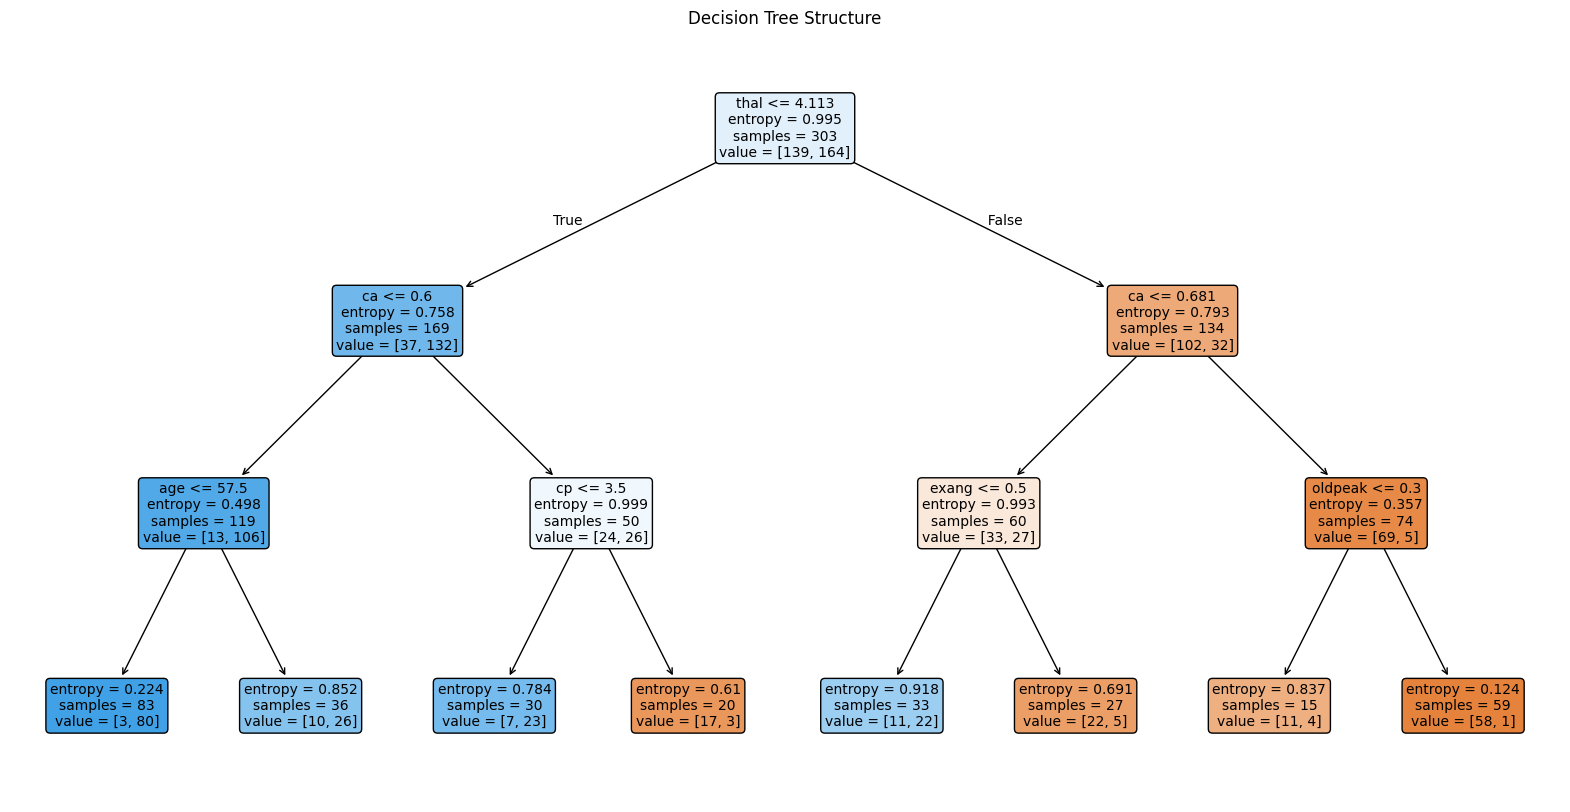

In [252]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(final_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

Features closer to the root in the decision tree are the most relevant, as they split the data early on. In this case thal is the most relevant and ca and oldpeak are the other significant features. This importance indicates these features contribute most to the model’s predictive power, often guiding the main decision paths in the classification process. 